In [2]:
import pymongo
import datetime
import dateutil
import pandas as pd
import random
from faker import Faker
fake = Faker(['es_ES','de_DE','es_AR','it_IT'])

# Retos de MongoDB 3

## Reto 1: Escenario de Trabajo
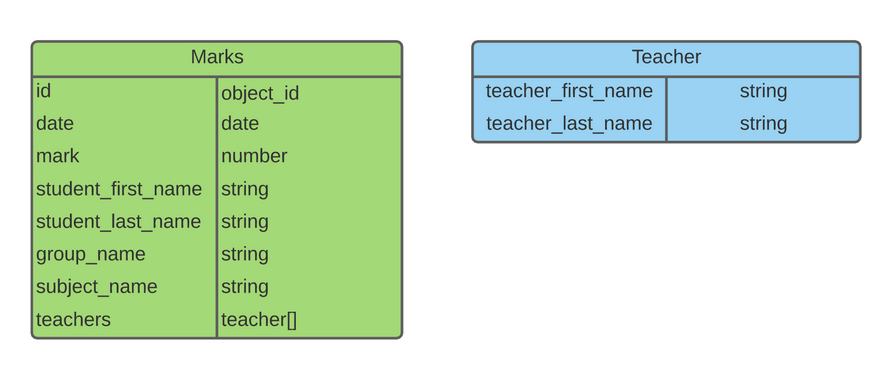

* **teachers** : El campo teachers es un array de subdocumentos Teacher.

* Suponemos que solo hay una nota por alumno asignatura.

* Crear una colección en MongoDB con este esquema y añadirle mínimo 10 documentos combinando todos los casos posibles usando python.


In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client.codenotch

In [4]:
collection = db.teachers

In [271]:
marks1 = {"date": dateutil.parser.parse("2023-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "3T", "subject_name": "Geografia","teachers": [fake.name(),fake.name()]}
marks2 = {"date": dateutil.parser.parse("2017-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "2W", "subject_name": "Natacion","teachers": [fake.name(),fake.name()]}
marks3 = {"date": dateutil.parser.parse("2023-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "3T", "subject_name": "Saxofon","teachers": [fake.name(),fake.name()]}
marks4 = {"date": dateutil.parser.parse("2003-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "4B", "subject_name": "Saxofon","teachers": [fake.name(),fake.name()]}
marks5 = {"date": dateutil.parser.parse("2023-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "2W", "subject_name": "Natacion","teachers": [fake.name(),fake.name()]}
marks6 = {"date": dateutil.parser.parse("2022-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "4B", "subject_name": "Natacion","teachers": [fake.name(),fake.name()]}
marks7 = {"date": dateutil.parser.parse("2013-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "3T", "subject_name": "Saxofon","teachers": [fake.name(),fake.name()]}
marks8 = {"date": dateutil.parser.parse("2020-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "2W", "subject_name": "Geografia","teachers": [fake.name(),fake.name()]}
marks9 = {"date": dateutil.parser.parse("2013-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "3T", "subject_name": "Geografia","teachers": [fake.name(),fake.name()]}
marks10 = {"date": dateutil.parser.parse("2021-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "3T", "subject_name": "Saxofon","teachers": [fake.name(),fake.name()]}
marks11 = {"date": dateutil.parser.parse("2019-05-04 00:00:00.000Z"),"mark": random.randint(0, 10),"student_firstname": str(fake.name().split(sep=' ')[0]),"student_lastname": str(fake.name().split(sep=' ')[1]), "group_name": "2W", "subject_name": "Natacion","teachers": [fake.name(),fake.name()]}

ids = collection.insert_many([marks1,marks2,marks3,marks4,marks5,marks6,marks7,marks8,marks9,marks10,marks11]).inserted_ids
print(ids)

[ObjectId('64cce284bd8a9676c28e5b6b'), ObjectId('64cce284bd8a9676c28e5b6c'), ObjectId('64cce284bd8a9676c28e5b6d'), ObjectId('64cce284bd8a9676c28e5b6e'), ObjectId('64cce284bd8a9676c28e5b6f'), ObjectId('64cce284bd8a9676c28e5b70'), ObjectId('64cce284bd8a9676c28e5b71'), ObjectId('64cce284bd8a9676c28e5b72'), ObjectId('64cce284bd8a9676c28e5b73'), ObjectId('64cce284bd8a9676c28e5b74'), ObjectId('64cce284bd8a9676c28e5b75')]


Calcular  la  nota media de los  alumnos  de una asignatura concreta. 



In [281]:
cursor = collection.aggregate ([{"$group" : { "_id" : "$subject_name", 
                                             "Nota media": {"$avg": "$mark"}}}])

for data in cursor:
    print(data)

{'_id': 'Natacion', 'Nota media': 5.5}
{'_id': 'Saxofon', 'Nota media': 3.25}
{'_id': 'Geografia', 'Nota media': 5.333333333333333}


Calcular  el número  total  de alumnos  que hay en el bootcamp incluyendo repetidos.

In [273]:
cursor = collection.aggregate ([{"$count": "student_firstname"}])
#marks_collection.count_documents({})

for data in cursor:
    print(data)

{'student_firstname': 11}


Listar  el nombre y los apellidos de todos los alumnos incluyendo repetidos.

In [315]:
#manera 1
cursor = collection.aggregate ([{"$project": {"_id": 0,
                                              "Nombre": "$student_firstname",
                                              "Apellido:" : "$student_lastname"}}])

for data in cursor:
    alumnos = []
    for alumno in (data.values()):
        alumnos.append(alumno)
    print(alumnos)

['Sr(a).', 'Alvarez']
['Benjamin', 'Navas']
['Francesco', 'Tiziana']
['Paulina', 'Felipe']
['Giovanni', 'Ruiz']
['Lia', 'Ramirez']
['Jelena', 'Tiziana']
['Marisela', 'Grossi-Asmundo']
['Dott.', 'Slavko']
['Dott.', 'Alvarez']
['Curro', 'Delfina']


In [ ]:
#manera 2
all_students = marks_collection.find({}, {"student_first_name": 1, "student_last_name": 1})
print("Nombre y apellidos de todos los alumnos:")
for student in all_students:
    print("{} {}".format(student["student_first_name"], student["student_last_name"]))

Listar el nombre y los apellidos de todos los profesores incluyendo repetidos.

In [318]:
cursor = collection.aggregate ([{"$project": {"_id": 0,
                                              "Profesor:" : "$teachers"}}])

for data in cursor:
    profesores = []
    for profesores_alumno in (data.values()):
        for profe in profesores_alumno:
            profesores.append(profe)
    print(profesores)

['Ottavio Fabbri', 'Anunciación Carlota Gámez Lucas']
['Simonetta Pasqua', 'Sig.ra Annetta Verga']
['Katrin Misicher-Holsten', 'Tiziana Cicilia']
['Dott. Stella Bottaro', 'Luka Segebahn']
['Venceslás de Ugarte', 'Dott. Lisa Raimondi']
['Polina Atzler', 'Néstor Villegas Leon']
['Genoveva Hartung', 'Monique Gehringer']
['Viridiana Novaro-Serraglio', 'Constanza Angélica Escrivá Tejera']
['Aria Tebaldi-Babato', 'Cruz Concha Arnaiz Llorente']
['Pellegrino Avogadro', 'Joaquin Diaz']
['América Cerro Morata', 'Annelore Linke']


In [ ]:
#manera felix:

all_teachers = marks_collection.find({}, {"teachers.first_name": 1, "teachers.last_name": 1})
print("Nombre y apellidos de todos los profesores:")
for ls_teachers in all_teachers:
    for teacher in ls_teachers["teachers"]:
        print(teacher['first_name'], teacher["last_name"])



Mostrar el número total de alumnos por grupo ordenados por grupo en orden inverso al alfabeto.

In [374]:
cursor = collection.aggregate ([{"$group" : { "_id" : "$group_name","mark": {"$sum": 1}}},
                               {"$sort": {"_id": -1}}])

for data in cursor:
    print(data)

{'_id': '4B', 'mark': 2}
{'_id': '3T', 'mark': 5}
{'_id': '2W', 'mark': 4}


Obtén  el top 5 de los  nombres  de  las asignaturas cuya  nota media sea mayor que 5.

In [378]:
cursor = collection.aggregate ([{"$group" : { "_id" : "$subject_name", 
                                             "Media": {"$avg": "$mark"}}},
                                {"$match": {"Media" : {"$gt" : 5}}},
                                {"$sort": {"_id": -1}},
                                {"$limit": 5}
                               ])

for data in cursor:
    print(data)

{'_id': 'Natacion', 'Media': 5.5}
{'_id': 'Geografia', 'Media': 5.333333333333333}


Calcular  el numero  de profesores que hay por  cada asignatura incluyendo repetidos.

In [5]:
pipeline = [
    {"$project": {"subject_name": 1, "num_teachers": {"$size": "$teachers"}}},
    {"$group": {"_id": "$subject_name", "total_teachers": {"$sum": "$num_teachers"}}}
]

cursor = collection.aggregate(pipeline)

for data in cursor:
    print(data)

{'_id': 'Geografia', 'total_teachers': 6}
{'_id': 'Natacion', 'total_teachers': 8}
{'_id': 'Saxofon', 'total_teachers': 8}


## Reto 2: Desarrollar los puntos con python
* Obtén  el  nombre, apellido  y  la  nota  de  los  alumnos  que  tengan una nota mayor  de 8 o la nota tenga fecha del año pasado o anterior.


In [9]:
x = dateutil.parser.parse("2023-01-01 00:00:00.000Z")

cursor = collection.aggregate ([{"$match":
                                 {"$or" : [ {"mark" : {"$gt" : 8}}, 
                                           {"date": {"$lt": x}}]}},
                               {"$project": {"_id": 0,
                                              "Nombre": "$student_firstname",
                                              "Apellido ": "$student_lastname",
                                              "Nota:" : "$mark"}}])

for data in cursor:
    print(data)

{'Nombre': 'Sr(a).', 'Apellido ': 'Alvarez', 'Nota:': 10}
{'Nombre': 'Benjamin', 'Apellido ': 'Navas', 'Nota:': 5}
{'Nombre': 'Paulina', 'Apellido ': 'Felipe', 'Nota:': 5}
{'Nombre': 'Lia', 'Apellido ': 'Ramirez', 'Nota:': 7}
{'Nombre': 'Jelena', 'Apellido ': 'Tiziana', 'Nota:': 1}
{'Nombre': 'Marisela', 'Apellido ': 'Grossi-Asmundo', 'Nota:': 4}
{'Nombre': 'Dott.', 'Apellido ': 'Slavko', 'Nota:': 2}
{'Nombre': 'Dott.', 'Apellido ': 'Alvarez', 'Nota:': 2}
{'Nombre': 'Curro', 'Apellido ': 'Delfina', 'Nota:': 8}


In [ ]:
#manera felix:
#Consulta para obtener los alumnos con nota mayor de 8 o fecha del año pasado o anterior
query = {
    "$or": [
        {"mark": {"$gt": 100}},
        {"date": {"$lte": one_year_ago}}
    ]
}

#Proyección para obtener solo el nombre, apellido y nota de los alumnos
projection = {"student_first_name": 1, "student_last_name": 1, "mark": 1, "_id": 0}

#Ejecutar la consulta
result = marks_collection.find(query, projection)




* Obtén la  media de las notas que se han  dado en el último  año por asignatura. 


In [10]:
cursor = collection.aggregate ([{"$match":{"date": {"$lt": x}}},
                                {"$group" : { "_id" : "$group_name","mark": {"$avg": "$mark"}}}])


for data in cursor:
    print(data)

{'_id': '2W', 'mark': 5.666666666666667}
{'_id': '4B', 'mark': 6.0}
{'_id': '3T', 'mark': 1.6666666666666667}



* Obtén la  media  aritmética de las notas que se han  dado en el último  año  por nombre de alumno.

In [388]:
cursor = collection.aggregate ([{"$match": {"date": {"$gt": x}}},
                                {"$group" : { "_id" : "$student_firstname", 
                                             "Nota media": {"$avg": "$mark"}}}])

for data in cursor:
    print(data)

{'_id': 'Sr(a).', 'Nota media': 10.0}
{'_id': 'Francesco', 'Nota media': 5.0}
{'_id': 'Giovanni', 'Nota media': 2.0}




* Obtén  los nombres de los alumnos y  la  cantidad  total  de  asignaturas por alumno cuyo profesor sea uno que elijáis.

In [11]:
cursor = collection.aggregate ([{"$match":{"teachers": {"$eq": "Tiziana Cicilia"}}},
                                {"$group" : { "_id" : "$student_firstname","subject_name": {"$sum": 1}}}])


for data in cursor:
    print(data)

{'_id': 'Francesco', 'subject_name': 1}


# Reto Opcional
* Crea un proceso que genere datos falsos (puedes usar una librería como [faker](https://github.com/joke2k/faker) cada 100-250ms y los persista en una colección mongo para que nos sirva para hacer diferentes agregaciones.

* Haz tres diferentes agregaciones con dichos datos y explica qué es lo que representan.

